In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [ ]:
data = pd.read_csv("/content/data_day5.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [ ]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data.shape

(569, 31)

In [ ]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

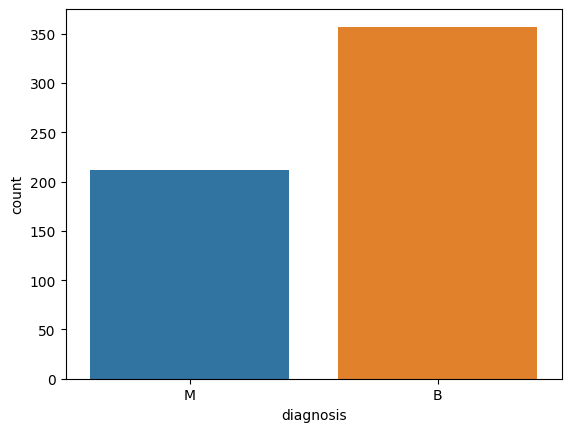

In [ ]:
sns.countplot(data=data, x='diagnosis')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['diagnosis'] = encoder.fit_transform(data['diagnosis'])

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

B -- > 0, and M -- > 1

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x = data.drop('diagnosis', axis=1)
y = data.diagnosis.values

In [ ]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)

In [ ]:
x.shape

(569, 30)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(455, 30)

In [ ]:
y_train.shape

(455,)

In [ ]:
x_test.shape

(114, 30)

In [ ]:
y_test.shape

(114,)

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class TabularData(Dataset):
  def __init__(self, x,y):
    super().__init__()
    self.x = torch.from_numpy(x).type(torch.float32)
    self.y = torch.from_numpy(y).type(torch.float32)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, id):
    return self.x[id], self.y[id]

In [ ]:
train_data = TabularData(x_train, y_train)

In [ ]:
train_data[2]

(tensor([-1.4071, -1.2635, -1.3498, -1.1205, -1.3628, -0.3190, -0.3631, -0.6995,
          1.9327,  0.9686,  0.0167,  1.9017, -0.1277, -0.3700,  0.5657,  0.7770,
          0.3722,  0.6170,  2.5884,  0.7668, -1.2962, -1.0499, -1.2412, -1.0029,
         -1.4908, -0.5500, -0.6356, -0.9705,  0.6168,  0.0529]),
 tensor(0.))

In [ ]:
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)

In [ ]:
class BinClr(torch.nn.Module):
  def __init__(self):
    super().__init__()

    self.layer1 = torch.nn.Linear(in_features=30, out_features=32)
    self.layer2 = torch.nn.Linear(in_features=32, out_features=16)
    self.layer3 = torch.nn.Linear(in_features= 16, out_features=1)
    self.relu = torch.nn.ReLU()

  def forward(self, x : torch.Tensor):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [ ]:
# class BinClr(torch.nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.order = torch.nn.Sequential(
#         torch.nn.Linear(in_features=30, out_features=32),
#         torch.nn.ReLU(),
#         torch.nn.Linear(in_features=32, out_features=16),
#         torch.nn.ReLU(),
#         torch.nn.Linear(in_features=16, out_features=1)
#     )

#   def forward(self, x : torch.Tensor):
#     return self.order(x)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cpu'

In [ ]:
model = BinClr().to(device)

In [ ]:
model

BinClr(
  (order): Sequential(
    (0): Linear(in_features=30, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [ ]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.1198,  0.1531,  0.0955, -0.1282,  0.1363, -0.0352, -0.1437,  0.1058,
                        0.1371,  0.0033, -0.0586, -0.1608,  0.1459,  0.1529,  0.1545, -0.0632,
                        0.1280, -0.0849,  0.0980,  0.1624, -0.0131, -0.1379, -0.0753,  0.0614,
                        0.1789,  0.0709,  0.0190, -0.1764,  0.1695, -0.0629],
                      [-0.0354,  0.0460,  0.1665,  0.0328,  0.1306, -0.1195, -0.0206,  0.0445,
                        0.0852, -0.1121,  0.1548,  0.0689,  0.1188,  0.1042, -0.1415, -0.0241,
                       -0.0508, -0.0417, -0.0030, -0.0148,  0.0164, -0.0340, -0.0853,  0.1552,
                        0.0438, -0.1062,  0.0263, -0.0584,  0.1034, -0.0993],
                      [ 0.1289, -0.0803, -0.1785, -0.0754,  0.0107,  0.1504, -0.0873,  0.1432,
                        0.1792,  0.0068, -0.1634,  0.1329, -0.0118,  0.1357,  0.1062,  0.0953,
                       -0.0942, -0.0252, -0.0891, -0.

In [ ]:
(torch.sigmoid(model(next(iter(train_loader))[0].type(torch.float32)))>=0.5).type(torch.int)

tensor([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=torch.int32)

In [ ]:
loss = torch.nn.BCELoss()#Binary cross entropy loss
optim = torch.optim.Adam(params = model.parameters(), lr = 0.001)

In [ ]:
epochs = 15

for epoch in range(epochs):
  temp_loss = []
  for i, (features, target) in enumerate(train_loader):
    model.train()

    y_pred = torch.sigmoid(model(features))

    loss_fn = loss(y_pred.squeeze(), target)

        temp_loss.append(loss_fn.item())

    optim.zero_grad()

    loss_fn.backward()

    optim.step()

  print(f"Epoch {epoch} | loss: {sum(temp_loss)/len(temp_loss)}")

Epoch 0 | loss: 0.6212286954386192
Epoch 1 | loss: 0.3156512248934361
Epoch 2 | loss: 0.14529537242886267
Epoch 3 | loss: 0.09643998800107
Epoch 4 | loss: 0.07620474008287777
Epoch 5 | loss: 0.06589861043622684
Epoch 6 | loss: 0.05833908264104506
Epoch 7 | loss: 0.05296114515084283
Epoch 8 | loss: 0.048507171026390176
Epoch 9 | loss: 0.044600356095511336
Epoch 10 | loss: 0.04163082836148852
Epoch 11 | loss: 0.0368843201809285
Epoch 12 | loss: 0.03415709229292381
Epoch 13 | loss: 0.032397672309200154
Epoch 14 | loss: 0.02908729335046557


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
x_test.shape

(114, 30)

In [ ]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
y_pred = torch.sigmoid(model(torch.from_numpy(x_test).type(torch.float32))).detach().numpy()

In [ ]:
y_pred = (y_pred>=0.5).astype(int).squeeze()

In [ ]:
score = 100*(accuracy_score(y_test, y_pred))

In [ ]:
score

98.24561403508771

<Axes: >

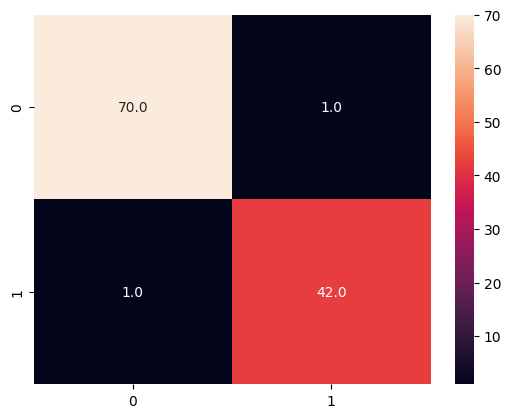

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='.1f', annot=True)

In [ ]:
#predictive system

In [ ]:
patient1 = x_train[1]

In [ ]:
result = (torch.sigmoid(model(torch.from_numpy(patient1).type(torch.float32)))>=0.5).type(torch.int)[0]

In [ ]:
if result == 0:
  print("It is Benign")
else:
  print("It is Malignant")

It is Malignant
